 ## dataset은 여기서 다운 받으시면 됩니다.
 
 
 https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3
 

### 간단한 특성 설명

id : listing ID

name : name of the listing

host_id : host ID

host_name : name of the host

neighbourhood_group : location

neighbourhood : area

latitude : latitude coordinates

longitude : longitude coordinates

room_type : listing space type

price : price in dollars

minimum_nights : amount of nights minimum

number_of_reviews : number of reviews

last_review : latest review

reviews_per_month : number of reviews per month

calculated_host_listings_count : amount of listing per host

availability_365 : number of days when listing is available for booking



# 그냥 심심해서 이것저것 보았습니다. 중요하진 않습니다. 
# One hot encoing은 뒤에 있어요!

In [20]:
%matplotlib inline

# import dependencies
import pandas as pd
import numpy as np
import sklearn
import matplotlib as matlib

# import dataset
# file_path 지정해주세요!
file_path = "/Users/ieunpyo/Downloads/AB_NYC_2019.csv"
bnb = pd.read_csv(file_path)

In [21]:
# data check
# head(), info(), describe(), hist(), value_counts() ... 

bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


####  neighbourhood_group, neighbourhood, room_type 정도가 categorical data로 보입니다!

In [22]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [23]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa19d6da90>,
      dtype=object)

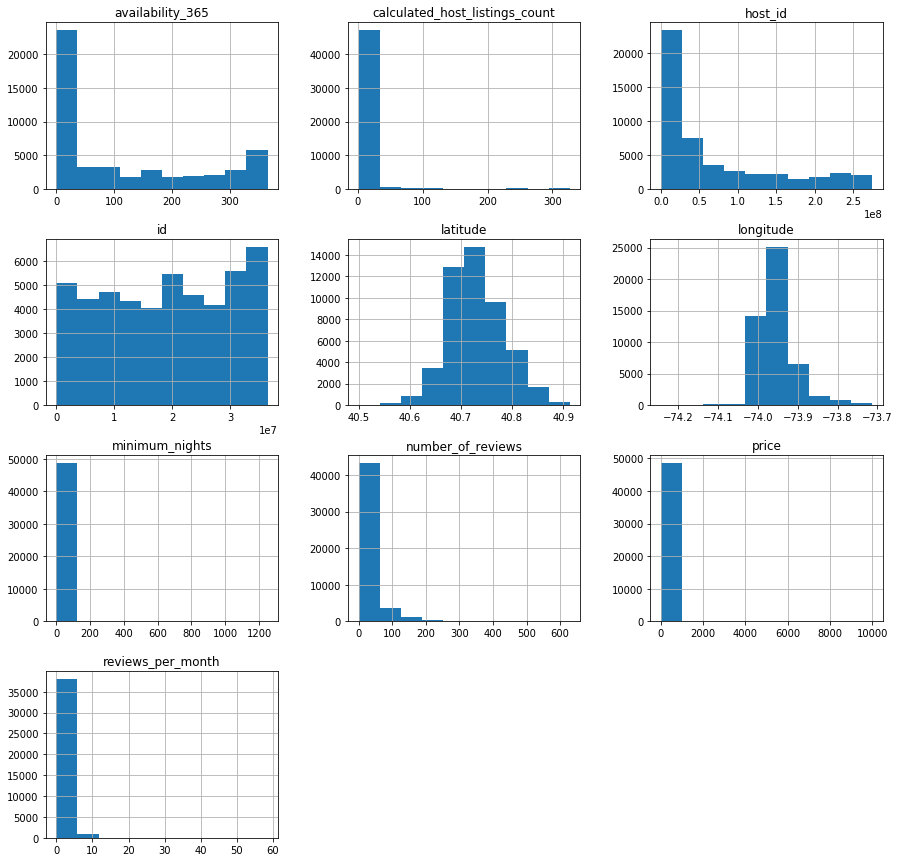

In [28]:
bnb.hist(figsize=[15,15])

### 주제가 Categorical Data 처리이므로 Categorical Data를 위주로 추가적으로 확인해보겠습니다.

#### neighbourhood, hoeighbourhood_groups,room_type

In [35]:
# unique한 value가 몇개 있는 지 세어보자. len(~~.unique())
len(bnb.neighbourhood.unique())

# 221개 - one_hot_encoding하면 모델 돌릴때 컴퓨터가 터질지도 모른다.

221

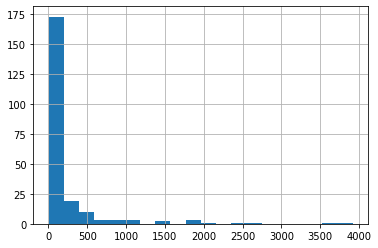

In [70]:
bnb.neighbourhood.value_counts().hist(bins=20)
# 대부분의 neighbourhood는 0~500회 사이에 등장하였다.

In [80]:
# 총 221개의 범주로 엄청 많긴 한데 등장 빈도가 많은 값들은 충분히 많긴 해서 무시하기도 애매,,,
# 한번 살펴보기로 하자.
bnb.neighbourhood.value_counts().head(30)

Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood                     423
Greenwich Vill

In [134]:
#neighbourhood_list 에는 내림차순으로 정렬된 동네 이름들이 들어가 있다.
neighbourhood_list=list(counts.index)
neighbourhood_list[0:5]

['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side']

In [140]:
# 동네 이름 중 데이터가 많은 10개만 뽑아서 bnb_1에 저장하였다.
bnb_1 = bnb[bnb['neighbourhood'].isin(neighbourhood_list[0:10])]

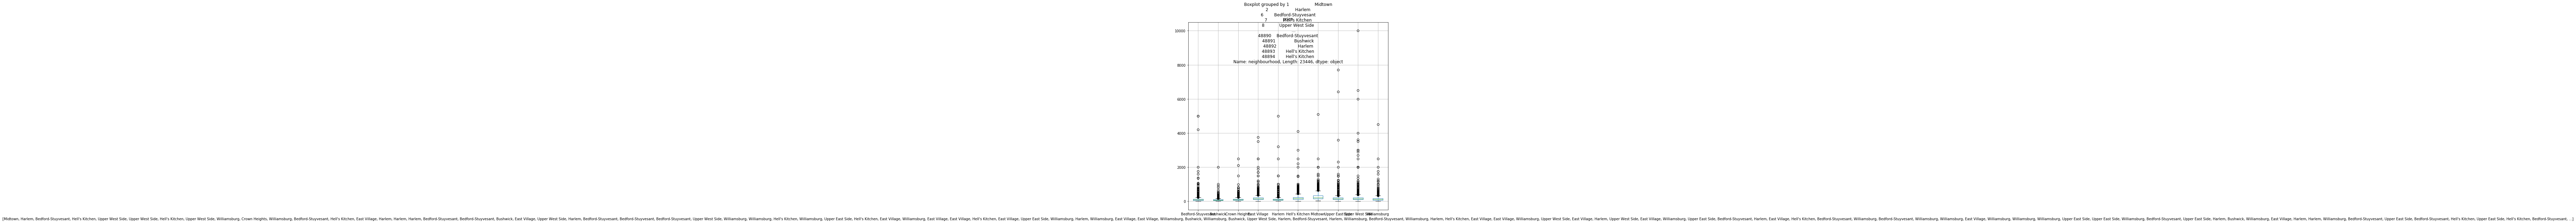

In [148]:
# 박스플롯 찍어봤는데 크게 잘 모르겠다,,,
bnb_1.boxplot(column=['price'],by=bnb_1.neighbourhood,figsize=[10,10])

In [30]:
bnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [31]:
bnb.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

In [32]:
bnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

# 이제 본격적으로 one hot encoding을 하자면,

### class sklearn.preprocessing.OneHotEncoder(n_values=None, categorical_features=None, categories=None, drop=None, sparse=True, dtype=<class ‘numpy.float64’>, handle_unknown=’error’)

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()


In [63]:
# one-hot encoding할 변수만 따로 모아놓기
categorical_columns= ['neighbourhood_group', 'room_type']
bnb_cat = bnb[categorical_columns]

In [47]:
# one_hot encoder에 fit & transform
bnb_cat_1hot = cat_encoder.fit_transform(bnb_cat) # fit_transform : 적합과 변환 한번에 해서 저장

In [64]:
# OneHotEnder 형식 : 기본적으로 sparse matrix
bnb_cat_1hot 

<48895x8 sparse matrix of type '<class 'numpy.float64'>'
	with 97790 stored elements in Compressed Sparse Row format>

In [52]:
# toarray()하게 되면 확인가능.
bnb_cat_1hot.toarray() 

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

#### 5개의 범주로 구성된 neighborhood_group, 3개의 범주로 구성된 room_type 범주 -> 총 8 자리로 된 one-hot encoder가 나온다


In [62]:
bnb_cat_1hot.toarray()[0:5,]  

array([[0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.]])

In [65]:
# cat_encoder에는 아까 fit method의 사용으로 fitting된 범주의 자료가 나와 있다.
# encoder_name.categories_ 사용으로 확인 가능.
# 단, 주의할 것은 transform해서 저장한 array에다가 categories_를 치는 것이 아니라,
# fitting해 준 encoder에다가 categories_ 해줘야 나온다.
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

### 옵션을 살펴보면,

#### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
#### drop ='first' : 설정할 경우 흔히 아는 dummy 방식으로 coding된다. 첫번째 범주가 삭제되고 고로 category 개수 -1 개로 코딩됨. 
#### sparse : boolean, default=True : 굳이 False로 놓을 이유가 없지만,,, False로 할 경우 sparse matrix로 저장되지 않는다.



In [153]:
cat_encoder2 = OneHotEncoder(drop='first', sparse=False)
bnb_cat_1hot_2 = cat_encoder2.fit_transform(bnb_cat)
bnb_cat_1hot_2

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.]])

In [155]:
bnb_cat_1hot_2[1,]  
# 보면 아까와 다르게 (8-2=)6개로 되어 있는데, OneHotEndoing하는 과정에서 범주형 특성이 2개 들어갔기 때문에 그러함.
# 즉, neighborhood 5개 중 첫번째 드랍, room_머시기 3개 중 첫번째 드랍해서 총 6개이다.

array([0., 1., 0., 0., 0., 0.])

# OrdinalEncoder

#### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
#### 진짜 뭐 없다. 아까 위랑 똑같은데 categorical data를 단지 0~(n-1)로 맵핑시켜준다. 


In [157]:
from sklearn.preprocessing import OrdinalEncoder 
cat_OrdinalEncoder = OrdinalEncoder()

In [159]:
cat_OrdinalEncoder.fit_transform(bnb_cat)

array([[1., 1.],
       [2., 0.],
       [2., 1.],
       ...,
       [2., 0.],
       [2., 2.],
       [2., 1.]])

In [162]:
cat_OrdinalEncoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]